In [7]:
# Manipulations
import pandas as pd
import re
from collections import Counter

# Plotting
import plotly_express as px
import matplotlib.pyplot as plt

# NLP
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

In [5]:
df = pd.read_csv("2024_decisions.csv")
df = df[df['Y'] >= 2024]

I made sure data was already in a good state for a future analysis, that meaning:
1) All the decisions are grouped in pre-defined areas. 
2) No free text is allowed for areas, only for decisions.
3) There is a year, month and week for each decision but not a date. This might sound like hell for analysts, but in this case the exact date was not necessary, just the timeline.
4) Everything is recorded in English.



In [13]:
area_cnt = df.groupby('Area').size().reset_index(name = 'cnt').sort_values(by = 'cnt', ascending = False)
fig = px.bar(area_cnt, x = 'Area', y = 'cnt')
fig.update_layout(title = 'Most "recorded" decisions are in the group "Sports & Health.')
fig.show()

In [22]:
area_cnt = df.groupby(['Area', 'M']).size().reset_index(name = 'cnt').sort_values(by = 'cnt', ascending = False)
# Todo: add cumulative
fig = px.bar(area_cnt, x = 'M', y = 'cnt', color = 'Area')
fig.update_layout(title = '')
fig.show()

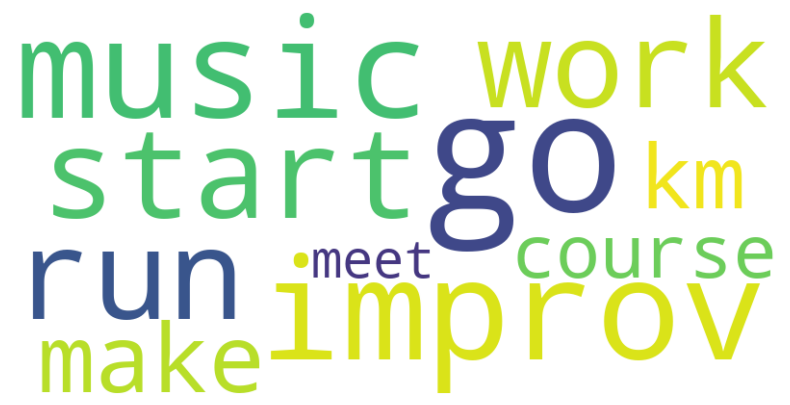

In [32]:
decisions = " ".join(df['Decision'])

words = re.findall(r'\w+', decisions.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)
top_20_words = dict(word_counts.most_common(10))
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(top_20_words)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('')
plt.show()